# **Создание модели на основе данных о качестве воздуха**

В этом проекте наша команда будет исследовать набор данных о качестве воздуха, чтобы обучить модель машинного обучения (ML), способную предсказывать концентрацию угарного газа в воздухе на основе концентрации различных загрязнителей, таких как металлические оксиды и углеводороды. Это также даст нам возможность работать с временными рядами.

Данные были получены из репозитория машинного обучения UCI здесь [UCI Machine Learning Repository - Air Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Air+Quality). Этот набор данных охватывает данные датчиков по различным загрязнителям, собранные с марта 2004 года по февраль 2005 года (1 год).

# **О наборе данных**

Этот набор данных содержит ответы устройства многосенсорного газового детектора, размещенного на местности в итальянском городе. В нем записаны средние почасовые показания вместе с эталонными концентрациями газов, полученными с помощью сертифицированного анализатора. Данные взяты из репозитория машинного обучения UCI: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

Набор данных содержит 9357 экземпляров почасовых усредненных ответов от массива из 5 химических сенсоров на основе металлических оксидов, встроенных в многосенсорное устройство контроля качества воздуха. Устройство было расположено на местности в значительно загрязненной области, на уровне дороги, в итальянском городе. Данные записывались с марта 2004 года по февраль 2005 года (один год), представляя самую длительную бесплатно доступную запись ответов устройств детектирования качества воздуха на местности. Почасовые усредненные концентрации для CO, неметановых углеводородов, бензола, общих оксидов азота ($NO_x$) и диоксида азота ($NO_2$) были предоставлены совместно расположенным эталонным сертифицированным анализатором. Присутствуют доказательства перекрестных чувствительностей, а также концептуальных и сенсорных сдвигов, как описано в работе Де Вито и др., Sens. And Act. B, Vol. 129,2,2008 (требуется цитирование), в конечном итоге влияющих на способности оценки концентраций сенсорами. Отсутствующие значения помечены значением -200. Этот набор данных может использоваться исключительно в исследовательских целях. Коммерческое использование полностью исключено.

## **Открытие данных и изучение общей информации**

In [45]:
# импортируем необходимые библиотеки для работы с данными
import pandas as pd
import numpy as np
import datetime

# для работы с визуализациями
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [47]:
# считываем csv-файл датасета в переменную data с использованием разделителей '\'
df = pd.read_csv('data/AirQuality.csv', sep=';')

In [3]:
# рассмотрим данные датасета (первые и последние 20 строчек)
display(df.head(20))
display(df.tail(20))

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# посмотрим основную информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


**Описание данных**

- 0 `Date` - дата (ДД/ММ/ГГГГ)
- 1 `Time` - время (ЧЧ.ММ.СС)
- 2 `CO(GT)` - истинная почасовая усредненная концентрация CO в $мг/м^3$ (эталонный анализатор)
- 3 `PT08.S1(CO)` - почасовой усредненный отклик сенсора (номинально нацеленный на CO)
- 4 `NMHC(GT)` - истинная почасовая усредненная общая концентрация неметановых углеводородов в $микрог/м^3$ (эталонный анализатор)
- 5 `C6H6(GT)` - истинная почасовая усредненная концентрация бензола в $микрог/м^3$ (эталонный анализатор)
- 6 `PT08.S2(NMHC)` - почасовой усредненный отклик сенсора (номинально нацеленный на NMHC)
- 7 `NOx(GT)` - истинная почасовая усредненная концентрация $NO_x$ в ппб (эталонный анализатор)
- 8 `PT08.S3(NOx)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_x$)
- 9 `NO2(GT)` - истинная почасовая усредненная концентрация $NO_2$ в $микрог/м^3$ (эталонный анализатор)
- 10 `PT08.S4(NO2)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_2$)
- 11 `PT08.S5(O3)` - почасовой усредненный отклик сенсора (номинально нацеленный на $O_3$)
- 12 `T` - температура в °C
- 13 `RH` - относительная влажность (%)
- 14 `AH` - абсолютная влажность

**По первоночальному ознакомлению с датасетом можно сказать следующее:**
- в датасете 17 столбцов с количеством строк - 9471
- в датасете присутствуют пропуски со значением `NaN` хотя в информации о датасете пропусков нет
- столбцы со временем и датой лучше объединить и преобразовать в формат `datetime`
- необходимо удалить столбцы `Unnamed: 15` и `Unnamed: 16`
- столбцах `CO(GT)`, `C6H6(GT)`, `T`, `RH`, `AH` необходимо поменять формат данных на float64

## **Предобработка данных**

Сначала удалим столбцы `Unnamed: 15` и `Unnamed: 16`

In [48]:
# удалим ненужные столбцы из датасета
df.drop(['Unnamed: 15','Unnamed: 16'], axis=1, inplace=True, errors = 'ignore') 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


Преобразуем столбцы `CO(GT)`, `C6H6(GT)`, `T`, `RH`, `AH` в формат float, при этом поменяем все запятые на точки, чтобы значения не исчезли

In [49]:
# преобразуем столбцы в формат float64
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    df[col] = df[col].str.replace(',', '.').astype(float)

Теперь поработаем над скрытыми пропусками. Из документации нам известно, что при значении `-200` замера не осуществлялось. Заменим эти значения на NaN

In [50]:
# Заменим значения -200 на NaN
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Похоже, что в столбце `NMHC(GT)` много некорректных показаний по сравнению со всеми другими датчиками. Посмотрим какой процент составляют нулевые значения относительно общего числа значений и решим стоит ли сохранять этот столбец или удалить его.

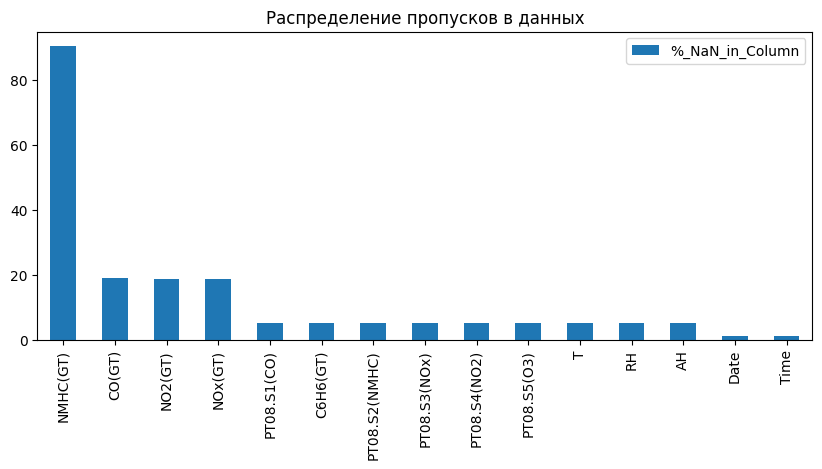

In [59]:
# создадим необходимые списки
percent_NaN = []
columns = df.columns
# создадим цикл определяющий процент пустых значений в столбцах
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100
    percent_NaN.append(pNaN)
    
nan_percent_df = pd.DataFrame(
    percent_NaN,
    index=columns,
    columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False
)

# посмотрим на полученные доли пустых значений в столбцах на столбчатой диаграмме
#nan_percent_df
nan_percent_df.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

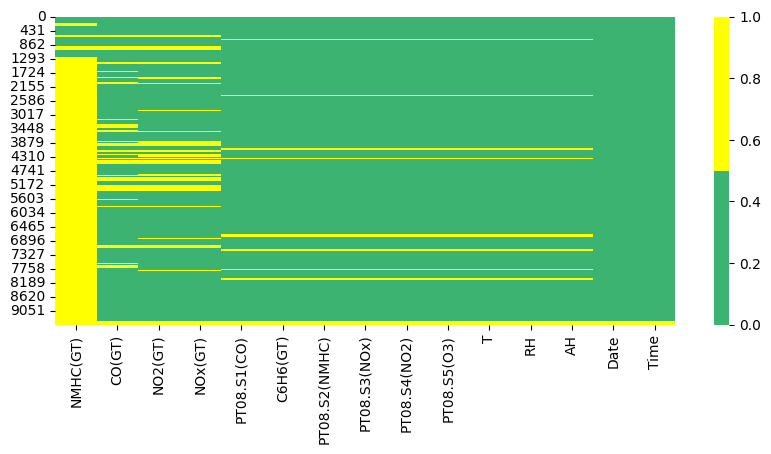

In [57]:
# Тепловая карта пропусков
colors = ['mediumseagreen', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = nan_percent_df.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

Как видим количество пустых значений в столбце `NMHC(GT)` более 90%. Его можно удалить. Также видим, что столбцы от `PT08.S1(CO)` до `AH`, связаны. Удалим все строки с пустыми значениями и продолжим предобработку датасета.

In [66]:
# удалим столбец NMHC(GT)
df.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore') 
# удалим пропуски из датасета
df = df.dropna()

# проверка удаления
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [68]:
# посмотрим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   object        
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
 14  DateTime       6941 non-null   datetime64[ns]
dtypes: datetime64[ns](1), floa

Осталось почти 7 тыс строк. Этого должно хватить для анализа и создания модели

Столбцы со временем и датой объединим и преобразуем в формат `datetime`

In [69]:
# создадим новый столбец со временем и датой
df['DateTime'] =  (df['Date']) + ' ' + (df['Time'])
# преобразуем его в формат datetime
df['DateTime'] = df['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00


Теперь создадим столбцы даты, дня недели, месяца и часа (ну вдруг понадобятся) и удалим столбец `Time`

In [70]:
# создадим новые столбцы
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month']   = df['DateTime'].dt.month_name()
df['Hour']    = df['DateTime'].dt.hour
# изменим формат столбца Date
df['Date']    = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# удалим столбец Time
df.drop('Time', axis=1, inplace=True, errors = 'ignore') 
# посмотрим начало датасета
df.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Weekday,Month,Hour
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,Wednesday,March,18
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,Wednesday,March,19
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,Wednesday,March,20
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,Wednesday,March,21
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,Wednesday,March,22


Изменим порядок столбцов для удобства

In [71]:
# изменим порядок столбцов
df = df[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
# посмотрим начало датасета
df.head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [72]:
# посмотрим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Month          6941 non-null   object        
 2   Weekday        6941 non-null   object        
 3   DateTime       6941 non-null   datetime64[ns]
 4   Hour           6941 non-null   int32         
 5   CO(GT)         6941 non-null   float64       
 6   PT08.S1(CO)    6941 non-null   float64       
 7   C6H6(GT)       6941 non-null   float64       
 8   PT08.S2(NMHC)  6941 non-null   float64       
 9   NOx(GT)        6941 non-null   float64       
 10  PT08.S3(NOx)   6941 non-null   float64       
 11  NO2(GT)        6941 non-null   float64       
 12  PT08.S4(NO2)   6941 non-null   float64       
 13  PT08.S5(O3)    6941 non-null   float64       
 14  T              6941 non-null   float64       
 15  RH             6941 non-nu

**Описание данных после предобработки**

- 0 `Date` - дата (ГГГГ/ММ/ДД)
- 1 `Month` - месяц замера
- 2 `Weekday` - день недели замера
- 3 `DateTime` - дата и время замера (ГГГГ/ММ/ДД ЧЧ:ММ:СС)
- 4 `Hour` - Час замера
- 5 `CO(GT)` - истинная почасовая усредненная концентрация CO в $мг/м^3$ (эталонный анализатор)
- 6 `PT08.S1(CO)` - почасовой усредненный отклик сенсора (номинально нацеленный на CO)
- 7 `C6H6(GT)` - истинная почасовая усредненная концентрация бензола в $микрог/м^3$ (эталонный анализатор)
- 8 `PT08.S2(NMHC)` - почасовой усредненный отклик сенсора (номинально нацеленный на NMHC)
- 9 `NOx(GT)` - истинная почасовая усредненная концентрация $NO_x$ в ппб (эталонный анализатор)
- 10 `PT08.S3(NOx)` - почасовой усредненный отклик сенсора (номинально нацеленный на NOx)
- 11 `NO2(GT)` - истинная почасовая усредненная концентрация $NO_2$ в $микрог/м^3$ (эталонный анализатор)
- 12 `PT08.S4(NO2)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_2$)
- 13 `PT08.S5(O3)` - почасовой усредненный отклик сенсора (номинально нацеленный на $O_3$)
- 14 `T` - температура в °C
- 15 `RH` - относительная влажность (%)
- 16 `AH` - абсолютная влажность

In [73]:
# посмотрим характеристики по датасету
df.describe()

,Date,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941,6941,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2004-09-27 13:44:27.454257280,2004-09-28 01:45:40.066272896,12.020170,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
min,2004-03-10 00:00:00,2004-03-10 18:00:00,0.000000,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,2004-06-15 00:00:00,2004-06-15 05:00:00,7.000000,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,2004-10-08 00:00:00,2004-10-08 05:00:00,12.000000,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2005-01-12 00:00:00,2005-01-12 18:00:00,18.000000,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,2005-04-04 00:00:00,2005-04-04 14:00:00,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600
std,NaN,NaN,6.813924,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097


## Разведывательный анализ данных

In [74]:
# порядковый номер месяца добавлен

df['Month_num'] = df["Date"].dt.month
df

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\2251860358.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month_num
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,April,Monday,2005-04-04 10:00:00,10,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4
9353,2005-04-04,April,Monday,2005-04-04 11:00:00,11,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4
9354,2005-04-04,April,Monday,2005-04-04 12:00:00,12,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4
9355,2005-04-04,April,Monday,2005-04-04 13:00:00,13,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4


### Концентрация вещества и отклик сенсора

In [75]:
# конецентрация CO и отклик сенсора по CO
fig = px.scatter(
    df,  
    x="CO(GT)", y="PT08.S1(CO)",  
    title="Зависимость концентрации CO от отклика сенсора CO",
)

fig.update_layout(
    xaxis_title="Отклик сенсора по CO",
    yaxis_title="Конецентрация CO"
)

fig.show()

In [76]:
# конецентрация NOx и отклик сенсора по NOx

fig = px.scatter(
    df,  
    x="NOx(GT)", y="PT08.S3(NOx)",  
    title="Зависимость концентрации и отклика сенсора NOx",
)

fig.update_layout(
    xaxis_title="Отклик сенсора по NOx",
    yaxis_title="Конецентрация NOx"
)

fig.show()

In [77]:
# конецентрация NO2 и отклик сенсора по NO2

fig = px.scatter(
    df,  
    x="NO2(GT)", y="PT08.S4(NO2)",  
    title="Зависимость концентрации и отклика сенсора NO2",
)

fig.update_layout(
    xaxis_title="Отклик сенсора по NO2",
    yaxis_title="Конецентрация NO2"
)

fig.show()

### КОММЕНТАРИЙ

- Есть два типа метрик по каждому веществу: истинная почасовая усредненная концентрация и отклик сенсора нацеленный на это вещество. Между ними есть корреляция.
- Мое предложение взять в работу истинную почасовую усредненную концентрацию.
- Предлагаю сосредоточиться на CO

###  Анализ CO

In [78]:
# CO по месяцам и часам
CO_hm = df.groupby(["Month_num", "Hour"]).agg({"CO(GT)": ['mean']})
CO_hm = CO_hm.reset_index()
CO_hm.columns = ["Month", "Hour", "CO(GT)"]

fig = go.Figure(
    data=go.Heatmap(
        z=CO_hm["CO(GT)"],
        x=CO_hm["Hour"],
        y=CO_hm["Month"],
    )
)

fig.update_layout(
    title="Концентрация CO по месяцам и часам",
    xaxis_title="Час замера",
    yaxis_title="Месяц"
)

fig.show()

In [79]:
# Среднемесячный уровень CO

CO_by_month = pd.pivot_table(
    df,
    index=["Month"],
    values=["CO(GT)"],
    aggfunc=[np.mean],
    fill_value=0,
    margins=True
)

CO_by_month= CO_by_month.reset_index()
CO_by_month.columns = ["Month", "CO(GT)"]

fig = px.histogram(CO_by_month, x="Month", y="CO(GT)")

fig.update_layout(
    title="Концентрация CO по месяцам",
    xaxis_title="Меясц",
    yaxis_title="Средняя концентрация CO"
)

fig.show()

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\1465855304.py:3: FutureWarning:

The provided callable <function mean at 0x000002D231562F70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [80]:
# Медианный уровень CO по месяцам. Чтобы проверить не влияют ли выбросы

CO_by_month = pd.pivot_table(
    df,
    index=["Month"],
    values=["CO(GT)"],
    aggfunc=[np.median],
    fill_value=0,
    margins=True
)

CO_by_month=CO_by_month.reset_index()
CO_by_month.columns = ["Month", "CO(GT)"]

fig = px.histogram(CO_by_month, x="Month", y="CO(GT)")

fig.update_layout(
    title="Концентрация CO по месяцам - медианы",
    xaxis_title="Месяц",
    yaxis_title="Средняя концентрация CO"
)

fig.show()

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\18493895.py:3: FutureWarning:

The provided callable <function median at 0x000002D23169F550> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



In [81]:
# средняя концентрация CO при различной температуре

CO_by_T= pd.pivot_table(
    df,
    index=["T"],
    values=["CO(GT)"],
    aggfunc=[np.mean],
    fill_value=0,
    margins=True
)

CO_by_T = CO_by_T.reset_index()
CO_by_T.columns = ["T", "CO(GT)"]

fig = px.scatter(
    CO_by_T,  
    x="T", y="CO(GT)", 
)

fig.update_layout(
    title="Зависимость концентрации CO и температуры воздуха",
    xaxis_title="Температура воздуха",
    yaxis_title="Средняя концентрация CO"
)

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\2835501990.py:3: FutureWarning:

The provided callable <function mean at 0x000002D231562F70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [82]:
# CO(GT) в зависимости от относительной влажности 

CO_by_RH= pd.pivot_table(
    df,
    index=["RH"],
    values=["CO(GT)"],
    aggfunc=[np.mean],
    fill_value=0,
    margins=True
)

CO_by_RH = CO_by_RH.reset_index()
CO_by_RH.columns = ["RH", "CO(GT)"]

fig = px.scatter(
    CO_by_RH,  
    x="RH", y="CO(GT)", 
)

fig.update_layout(
    title="Зависимость концентрации CO и относительной влажности",
    xaxis_title="Относительная влажность",
    yaxis_title="Средняя концентрация CO"
)

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\59449421.py:3: FutureWarning:

The provided callable <function mean at 0x000002D231562F70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [83]:
# CO(GT) в зависимости от абсолютной влажности 

CO_by_AH= pd.pivot_table(
    df,
    index=["AH"],
    values=["CO(GT)"],
    aggfunc=[np.mean],
    fill_value=0,
    margins=True
)

CO_by_AH = CO_by_AH.reset_index()
CO_by_AH.columns = ["AH", "CO(GT)"]

fig = px.scatter(
    CO_by_AH,  
    x="AH", y="CO(GT)", 
)

fig.update_layout(
    title="Зависимость концентрации CO и абсолютной влажности",
    xaxis_title="Абсолютная влажность",
    yaxis_title="Средняя концентрация CO"
)

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\1341444474.py:3: FutureWarning:

The provided callable <function mean at 0x000002D231562F70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [84]:
# Средний уровень концентрации CO по дням недели
CO_by_day = pd.pivot_table(
    df,
    index=["Weekday"],
    values=["CO(GT)"],
    aggfunc=[np.mean],
    fill_value=0,
    margins=True
)

CO_by_day= CO_by_day.reset_index()
CO_by_day.columns = ["Weekday", "CO(GT)"]

fig = px.histogram(CO_by_day, x="Weekday", y = "CO(GT)")

fig.update_layout(
    title="Зависимость концентрации CO по дням недели",
    xaxis_title="День недели",
    yaxis_title="Средняя концентрация CO"
)

fig.show()

C:\Users\smart\AppData\Local\Temp\ipykernel_29076\2090669520.py:2: FutureWarning:

The provided callable <function mean at 0x000002D231562F70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



#### Промежуточные выводы

- Концентарция CO зависит от времени суток, ночью ниже. 
- Также в выходные и понедельник ниже концентрация CO
- Есть некоторая сезонность. Август - самая низкая концентрация. Октябрь, Ноябрь, Декабрь - самая высокая. Значит дело не только в температуре.
- Температура похоже влияет на концентарцию CO
- Влажность можно не брать для модели. Как будто ни относительная, ни абсолютная влажность не влияет на CO


#### Предложение
- Я предлагаю прогнозировать уровень CO в зависимости от времнени года (месяца), темпертуры и возможно дня недели.
- Концентрация CO зависит от часа замера. Мое предложение выводить максимальный уровень за сутки.

In [85]:
df

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month_num
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,April,Monday,2005-04-04 10:00:00,10,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4
9353,2005-04-04,April,Monday,2005-04-04 11:00:00,11,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4
9354,2005-04-04,April,Monday,2005-04-04 12:00:00,12,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4
9355,2005-04-04,April,Monday,2005-04-04 13:00:00,13,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4


In [29]:
# датафрейм для обучения

#df= df[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)', 'T']]
#df.head()

## Очистка данных

### Поиск дубликатов

In [86]:
# Поиск дубликатов
duplicates = df[df.duplicated()]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 0


### Поиск выбросов

**Описание данных**

- 0 `Date` - дата (ДД/ММ/ГГГГ)
- 1 `Time` - время (ЧЧ.ММ.СС)
- 2 `CO(GT)` - истинная почасовая усредненная концентрация CO в $мг/м^3$ (эталонный анализатор)
- 3 `PT08.S1(CO)` - почасовой усредненный отклик сенсора (номинально нацеленный на CO)
- 4 `NMHC(GT)` - истинная почасовая усредненная общая концентрация неметановых углеводородов в $микрог/м^3$ (эталонный анализатор)
- 5 `C6H6(GT)` - истинная почасовая усредненная концентрация бензола в $микрог/м^3$ (эталонный анализатор)
- 6 `PT08.S2(NMHC)` - почасовой усредненный отклик сенсора (номинально нацеленный на NMHC)
- 7 `NOx(GT)` - истинная почасовая усредненная концентрация $NO_x$ в ппб (эталонный анализатор)
- 8 `PT08.S3(NOx)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_x$)
- 9 `NO2(GT)` - истинная почасовая усредненная концентрация $NO_2$ в $микрог/м^3$ (эталонный анализатор)
- 10 `PT08.S4(NO2)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_2$)
- 11 `PT08.S5(O3)` - почасовой усредненный отклик сенсора (номинально нацеленный на $O_3$)
- 12 `T` - температура в °C
- 13 `RH` - относительная влажность (%)
- 14 `AH` - абсолютная влажность

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   DateTime       6941 non-null   datetime64[ns]
 2   Hour           6941 non-null   int32         
 3   CO(GT)         6941 non-null   float64       
 4   PT08.S1(CO)    6941 non-null   float64       
 5   C6H6(GT)       6941 non-null   float64       
 6   PT08.S2(NMHC)  6941 non-null   float64       
 7   NOx(GT)        6941 non-null   float64       
 8   PT08.S3(NOx)   6941 non-null   float64       
 9   NO2(GT)        6941 non-null   float64       
 10  PT08.S4(NO2)   6941 non-null   float64       
 11  PT08.S5(O3)    6941 non-null   float64       
 12  T              6941 non-null   float64       
 13  RH             6941 non-null   float64       
 14  AH             6941 non-null   float64       
 15  Month_num      6941 non-nu

In [124]:
colors = sns.color_palette('flare', n_colors=10)
colors[0]

(0.92118373, 0.60184659, 0.45048789)

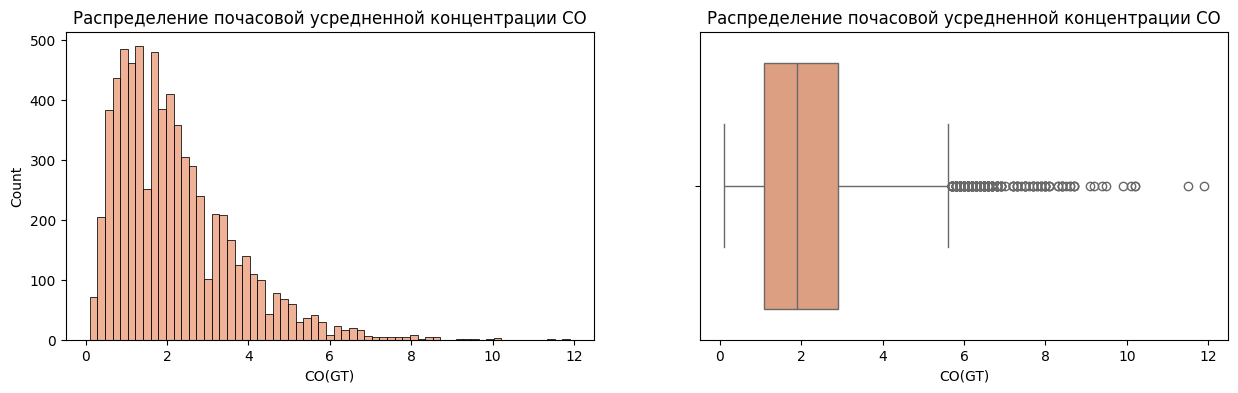

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='CO(GT)', color=colors[0], ax=axes[0]);
histplot.set_title('Распределение почасовой усредненной концентрации CO');
boxplot = sns.boxplot(data=df, x='CO(GT)', color=colors[0], ax=axes[1]);
boxplot.set_title('Распределение почасовой усредненной концентрации CO');

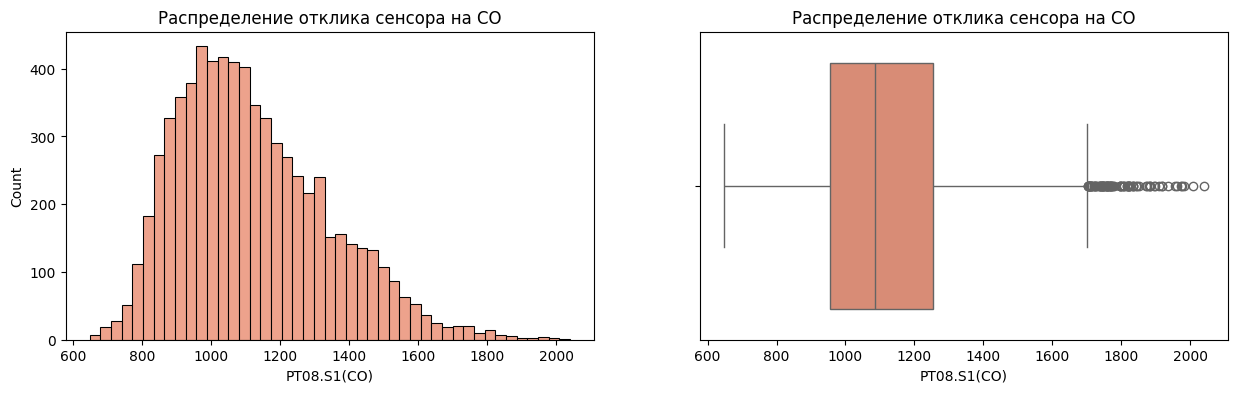

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='PT08.S1(CO)', color=colors[1], ax=axes[0]);
histplot.set_title('Распределение отклика сенсора на CO');
boxplot = sns.boxplot(data=df, x='PT08.S1(CO)', color=colors[1], ax=axes[1]);
boxplot.set_title('Распределение отклика сенсора на CO');

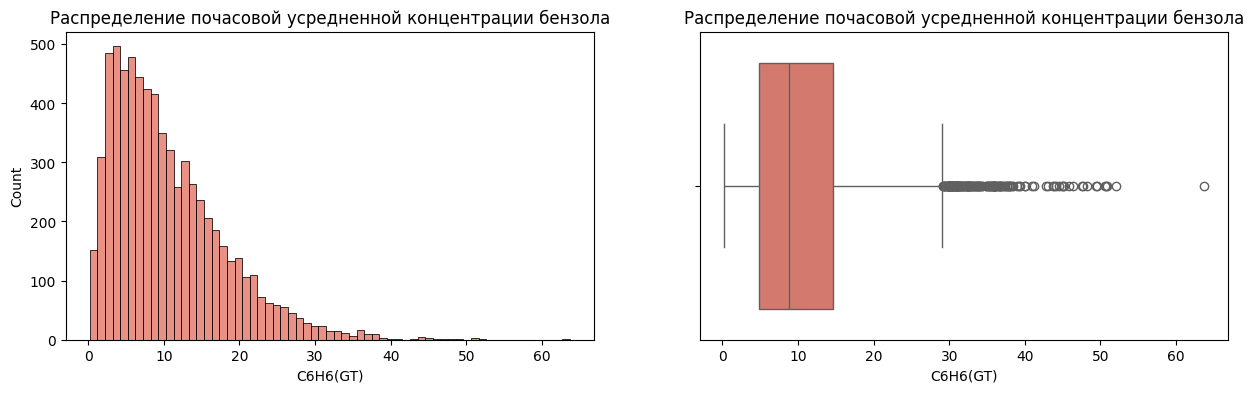

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='C6H6(GT)', color=colors[2], ax=axes[0]);
histplot.set_title('Распределение почасовой усредненной концентрации бензола');
boxplot = sns.boxplot(data=df, x='C6H6(GT)', color=colors[2], ax=axes[1]);
boxplot.set_title('Распределение почасовой усредненной концентрации бензола');

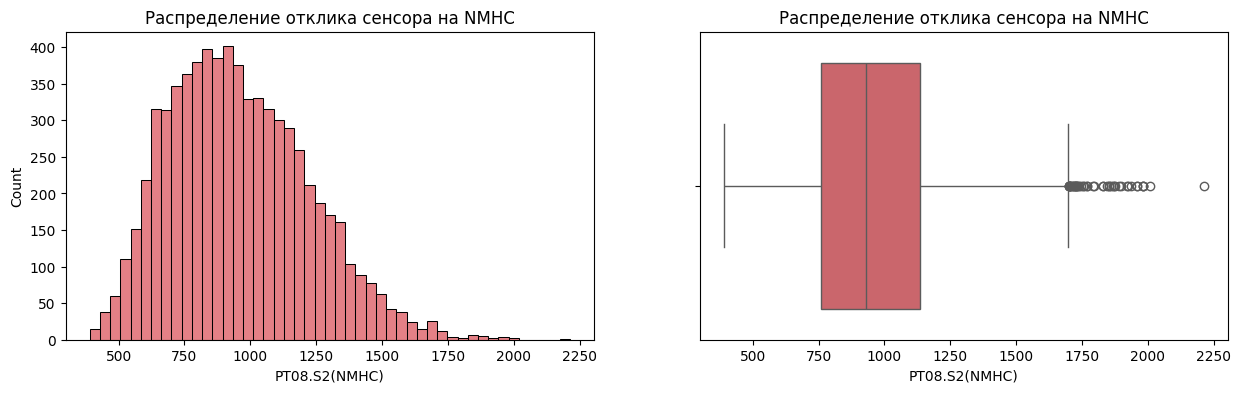

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='PT08.S2(NMHC)', color=colors[3], ax=axes[0]);
histplot.set_title('Распределение отклика сенсора на NMHC');
boxplot = sns.boxplot(data=df, x='PT08.S2(NMHC)', color=colors[3], ax=axes[1]);
boxplot.set_title('Распределение отклика сенсора на NMHC');

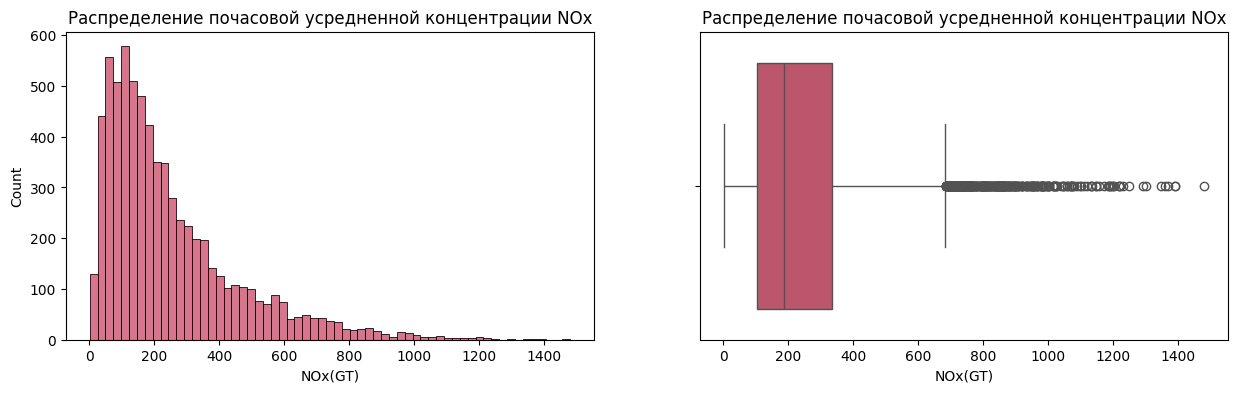

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='NOx(GT)', color=colors[4], ax=axes[0]);
histplot.set_title('Распределение почасовой усредненной концентрации NOx');
boxplot = sns.boxplot(data=df, x='NOx(GT)', color=colors[4], ax=axes[1]);
boxplot.set_title('Распределение почасовой усредненной концентрации NOx');

### Матрица корреляции

<Axes: >

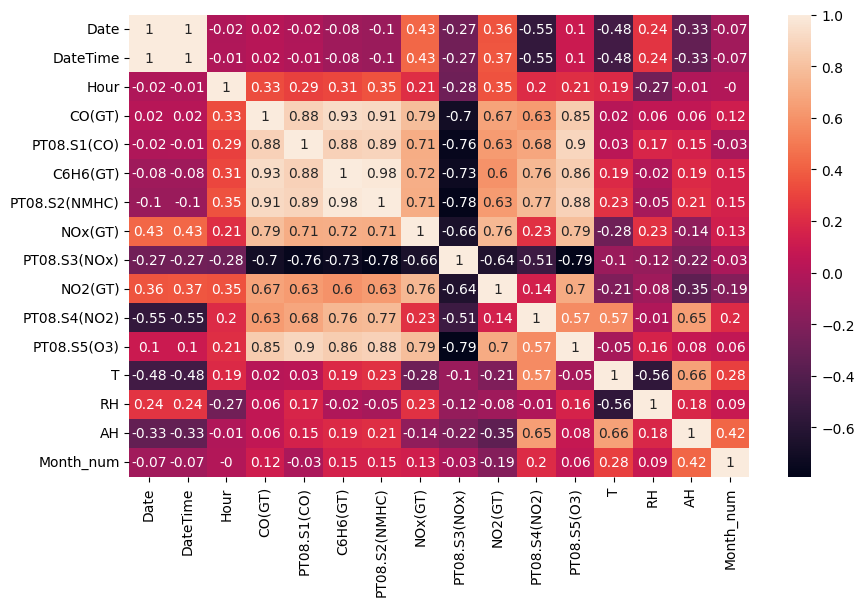

In [100]:
df_corr = df.copy()
fig = plt.figure(figsize=(10, 6))
for i in df_corr:
    if df[i].dtype == 'object': df_corr.drop(i, axis=1, inplace=True)
corr = round(df_corr.corr(), 2)
sns.heatmap(corr, annot=True)